In [ ]:
!pip3 install --upgrade pandas

In [11]:
import nltk 
nltk.download("wordnet")
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
from google.colab import drive
drive.mount('/drive', force_remount=True)

%cd "/drive/MyDrive/TextMiningProject/"

Mounted at /drive
/drive/MyDrive/TextMiningProject


In [3]:
# !pip install tweet-preprocessor
!pip install sklearn
!pip install matplotlib
!pip install import_ipynb

!pip install pandas

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-py3-none-any.whl size=2975 sha256=b7a144962680ab1e6b10c80c4b97a4e7c9b9e86f608c3051ced6ad7394c59d45
  Stored in directory: /root/.cache/pip/wheels/b1/5e/dc/79780689896a056199b0b9f24471e3ee184fbd816df355d5f0
Successfully built import-ipynb


In [9]:
import sys
import os

py_file_location = "/drive/MyDrive/TextMiningProject/text-preprocessing-techniques"
sys.path.append(os.path.abspath(py_file_location))

In [57]:
import pandas as pd
import random
import seaborn as sn
from sklearn.utils import shuffle
import numpy as np
from sklearn.model_selection import GridSearchCV
#import preprocessor
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.dummy import DummyClassifier
import import_ipynb
from Utilities_2 import *
from preprocess import tokenize 

In [58]:
genuine_sample, bot = generate_data()

In [59]:
train, test = generate_train_test(genuine_sample, bot)


/drive/MyDrive/TextMiningProject/Utilities_2.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ssb3_train["Label"] = "bot"
/drive/MyDrive/TextMiningProject/Utilities_2.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genuine_train["Label"] = "genuine"


In [60]:

report_values(train, test)

,Train,Test
genuine,74539,31946
bot,8852,3794


In [61]:
# Run this cell to downsample

train = downsample(train)
test = downsample(test)

# train_1 = downsample_prop(train_1, 0.5)
# train_2 = downsample_prop(train_2, 0.5)
# test_1 = downsample_prop(te<st_1, 0.5)
# test_2 = downsample_prop(test_2, 0.5)



In [62]:
report_values(train, test)

,Train,Test
bot,8852,3794
genuine,8852,3794


In [63]:
# def tokenize_to_txt(df, output_name):
#   text_array = df["text"].values.astype('U')
  
#   with open("tokenized_" + output_name + ".txt", "a") as result:

#     for tweet in text_array:
#       tokenized = tokenize(tweet)
#       tokenized_line = " ".join(tokenized)
#       result.write(tokenized_line + "\n")

  
# tokenize_to_txt(genuine_sample, "genuine_scraped")
# tokenize_to_txt(bot, "bot_scraped")
# # tokenize_to_txt(ssb3, "ssb3")

## Naive Bayes classifier

In [64]:

pipe = Pipeline([('vectorize ', CountVectorizer()), ('MNB', MultinomialNB())])
pipe.fit(train["text"].values.astype('U'), train["Label"])


Pipeline(steps=[('vectorize ', CountVectorizer()), ('MNB', MultinomialNB())])

In [65]:
print(classification_report(test["Label"], pipe.predict(test["text"].values.astype('U'))))

              precision    recall  f1-score   support

         bot       0.76      0.70      0.73      3794
     genuine       0.72      0.78      0.75      3794

    accuracy                           0.74      7588
   macro avg       0.74      0.74      0.74      7588
weighted avg       0.74      0.74      0.74      7588



In [66]:
cm = confusion_matrix(test["Label"], pipe.predict(test["text"].values.astype('U')), normalize="true")

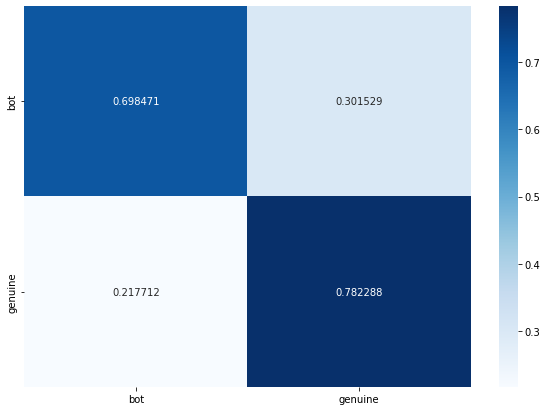

In [67]:
plot_confusion_matrix_custom(cm)

## Baselines

## Dummy Classifier

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.dummy import DummyClassifier


dummy = Pipeline([('vectorize ', CountVectorizer()), ('dummy', DummyClassifier(strategy = 'stratified'))])

dummy.fit(train["text"].values.astype('U'), train["Label"])

print(classification_report(test["Label"], dummy.predict(test["text"].values.astype('U'))))

              precision    recall  f1-score   support

         bot       0.50      0.50      0.50      3794
     genuine       0.50      0.50      0.50      3794

    accuracy                           0.50      7588
   macro avg       0.50      0.50      0.50      7588
weighted avg       0.50      0.50      0.50      7588



In [69]:
cm = confusion_matrix(test["Label"], dummy.predict(test["text"].values.astype('U')))

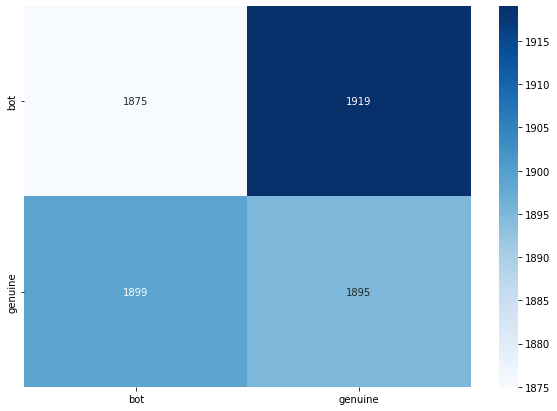

In [70]:
plot_confusion_matrix_custom(cm)

## Grid Search with NB classifier

In [71]:
# how to change scoring? 

parameters = {'vectorize __binary':(True, False), 'vectorize __ngram_range':[(1,1), (1,2)], "MNB__alpha" : (1,0.1) }

clf = GridSearchCV(pipe, parameters, scoring = "f1_weighted", cv = 5, refit = True, verbose=2, n_jobs=-1)
clf.fit(train["text"].values.astype('U'), train["Label"])
print(classification_report(test["Label"], clf.predict(test["text"].values.astype('U'))))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
              precision    recall  f1-score   support

         bot       0.78      0.71      0.74      3794
     genuine       0.73      0.80      0.76      3794

    accuracy                           0.75      7588
   macro avg       0.76      0.75      0.75      7588
weighted avg       0.76      0.75      0.75      7588



In [72]:
clf.best_estimator_

Pipeline(steps=[('vectorize ',
                 CountVectorizer(binary=True, ngram_range=(1, 2))),
                ('MNB', MultinomialNB(alpha=1))])

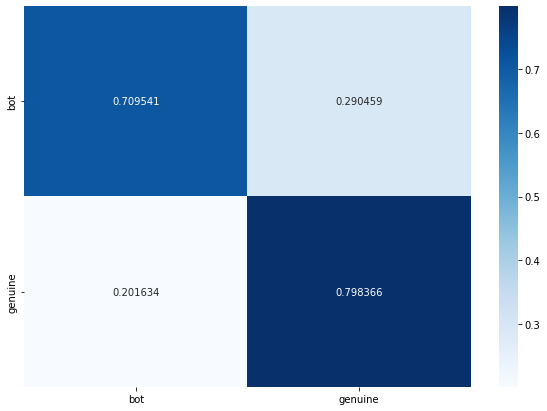

In [73]:
cm = confusion_matrix(test["Label"], clf.predict(test["text"].values.astype('U')), normalize="true")
plot_confusion_matrix_custom(cm)

## Grid Search with Logistic regression 

In [75]:
# train = downsample_prop(train, 0.5)
# train_2 = downsample_prop(train_2, 0.5)
# test = downsample_prop(test, 0.5)
# test_2 = downsample_prop(test_2, 0.5)
report_values(train, test)

,Train,Test
bot,8852,3794
genuine,8852,3794


In [76]:
from sklearn.linear_model import LogisticRegression

GBC = Pipeline([('vectorize ', CountVectorizer()), ('LG', LogisticRegression(solver='liblinear'))])

parameters = {'vectorize __ngram_range':[(1,1), (1,2), (2,2)], "LG__C" : [0.1, 0.5, 1]}

#scor = {"F1": "f1"}


clf = GridSearchCV(GBC, parameters, cv = 5, scoring = "f1_weighted", refit = True, verbose = 2,  n_jobs=-1)
clf.fit(train["text"].values.astype('U'), train["Label"])
print(classification_report(test["Label"], clf.predict(test["text"].values.astype('U'))))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
              precision    recall  f1-score   support

         bot       0.77      0.71      0.74      3794
     genuine       0.73      0.79      0.76      3794

    accuracy                           0.75      7588
   macro avg       0.75      0.75      0.75      7588
weighted avg       0.75      0.75      0.75      7588



In [77]:
clf.best_estimator_

Pipeline(steps=[('vectorize ', CountVectorizer(ngram_range=(1, 2))),
                ('LG', LogisticRegression(C=0.1, solver='liblinear'))])

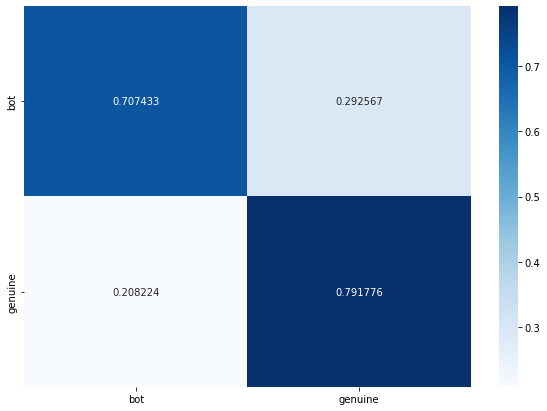

In [78]:
cm = confusion_matrix(test["Label"], clf.predict(test["text"].values.astype('U')), normalize="true")
plot_confusion_matrix_custom(cm)

## Grid Search with Decision Trees 

In [79]:
from sklearn.tree import DecisionTreeClassifier

DT = Pipeline([('vectorize ', CountVectorizer()), ('DT', DecisionTreeClassifier())])
  
parameters = {'vectorize __ngram_range':[(1,1), (1,2), (2,2)], "DT__max_depth" : [30, 60, 120]}



clf = GridSearchCV(DT, parameters, cv = 5, scoring = "f1_weighted", refit = True, verbose = 2,  n_jobs=-1)
clf.fit(train["text"].values.astype('U'), train["Label"])
print(classification_report(test["Label"], clf.predict(test["text"].values.astype('U'))))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
              precision    recall  f1-score   support

         bot       0.70      0.68      0.69      3794
     genuine       0.69      0.70      0.70      3794

    accuracy                           0.69      7588
   macro avg       0.69      0.69      0.69      7588
weighted avg       0.69      0.69      0.69      7588



In [80]:
clf.best_estimator_

Pipeline(steps=[('vectorize ', CountVectorizer(ngram_range=(1, 2))),
                ('DT', DecisionTreeClassifier(max_depth=30))])

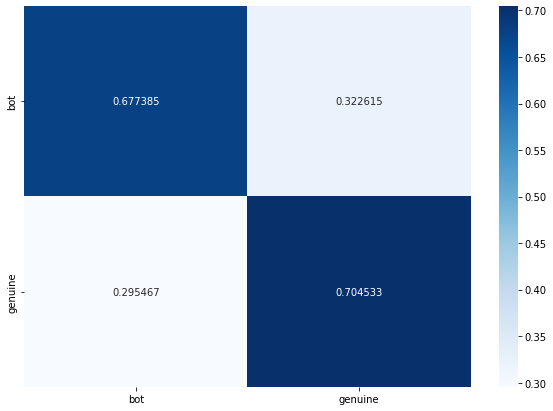

In [81]:
cm = confusion_matrix(test["Label"], clf.predict(test["text"].values.astype('U')), normalize="true")
plot_confusion_matrix_custom(cm)

## Grid Search with Support vector Machines

In [82]:
for i in range(3):  
  train = downsample_prop(train, 0.5)
  test = downsample_prop(test, 0.5)

train = downsample(train)
test = downsample(test)
report_values(train, test)


,Train,Test
bot,1089,463
genuine,1089,463


In [83]:
param_grid = {'C': [1, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}

from sklearn.svm import SVC

SVC = Pipeline([('vectorize ', CountVectorizer()), ('SVC', SVC())])
  
parameters = {'vectorize __ngram_range':[(1,1), (1,2), (2,2)], "SVC__C" : param_grid['C'], 'SVC__gamma': param_grid['gamma'], 'SVC__kernel': param_grid['kernel'] }



clf = GridSearchCV(SVC, parameters, cv = 4, scoring = "f1_weighted", refit = True, verbose = 2,  n_jobs=-1)

clf.fit(train["text"].values.astype('U'), train["Label"])

print(classification_report(test["Label"], clf.predict(test["text"].values.astype('U'))))

Fitting 4 folds for each of 18 candidates, totalling 72 fits
              precision    recall  f1-score   support

         bot       0.72      0.64      0.68       463
     genuine       0.68      0.75      0.71       463

    accuracy                           0.70       926
   macro avg       0.70      0.70      0.69       926
weighted avg       0.70      0.70      0.69       926



In [84]:
clf.best_estimator_

Pipeline(steps=[('vectorize ', CountVectorizer(ngram_range=(1, 2))),
                ('SVC', SVC(C=100, gamma=0.0001))])

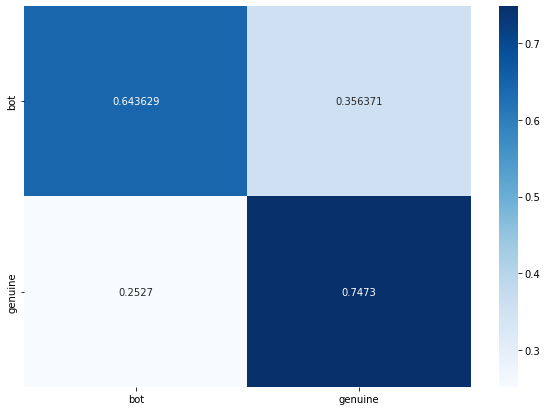

In [85]:
cm = confusion_matrix(test["Label"], clf.predict(test["text"].values.astype('U')), normalize="true")
plot_confusion_matrix_custom(cm)